# Trump vs Clinton: The 2016 US Election

In [1]:
from IPython.display import HTML
html1 = '<img src="trumpclinton.jpg" width="700" height="700" align="center"/>'
HTML(html1)

### Trump and Clinton have had a bitter-sweet relationship and throughout the election, the voters were quite confused. In this project, we try to understand and analyse what they were like on the basis of their tweets. 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


Installations for widgets

In [3]:
!pip install ipyleaflet
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
import os
from IPython.display import Image, display, HTML

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline

Reading Data

In [7]:
import pandas as pd
tweets = pd.read_csv("tweets.csv")
tweets = tweets[[ 'handle', 'text', 'is_retweet', 'original_author', 'time', 'lang', 'retweet_count', 'favorite_count']]

In [8]:
tweets

,handle,text,is_retweet,original_author,time,lang,retweet_count,favorite_count
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,en,218,651
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,en,2445,5308
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,en,7834,27234
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,en,916,2542
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,en,859,2882
...,...,...,...,...,...,...,...,...
6439,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo...",False,NaN,2016-01-05T03:47:14,en,1110,4024
6440,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell...",False,NaN,2016-01-05T03:44:17,en,855,3181
6441,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r...",False,NaN,2016-01-05T03:42:10,en,2315,5992
6442,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22...",False,NaN,2016-01-05T03:39:11,en,1054,3258


In [9]:
tweets.shape

(6444, 8)

In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Widget 1: Filter data on the basis of values in the numeric columns

In [11]:
@interact
def show_recs_more_than(column=list(tweets.select_dtypes('number').columns), 
                          x=(0, 9000, 5)):
    display(HTML(f'<h2>Showing records with more than {x} {column}<h2>'))
    display(tweets.loc[tweets[column] > x, [ 'handle', 'text', 'retweet_count', 'favorite_count']])

interactive(children=(Dropdown(description='column', options=('retweet_count', 'favorite_count'), value='retwe…

## Widget 2: Find correlations between any two columns

In [12]:
@interact
def correlations(column1=list(tweets.select_dtypes('number').columns), 
                 column2=list(tweets.select_dtypes('number').columns)):
    print(f"Correlation: {tweets[column1].corr(tweets[column2])}")

interactive(children=(Dropdown(description='column1', options=('retweet_count', 'favorite_count'), value='retw…

## Widget 3: Describe any column

In [13]:
@interact
def describe(column=list(tweets.columns)):
    print(tweets[column].describe())

interactive(children=(Dropdown(description='column', options=('handle', 'text', 'is_retweet', 'original_author…

## Widget 4: Plot scatter plots between any two numeric columns

In [14]:
@interact
def scatter_plot(x=list(tweets.select_dtypes('number').columns), 
                 y=list(tweets.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    tweets.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 

             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('retweet_count', 'favorite_count'), value='retweet_co…

## Which languages have they tweeted in?

In [15]:
tweets['lang'].value_counts()

en     6248
es      105
und      82
da        3
tl        2
fr        2
fi        1
et        1
Name: lang, dtype: int64

In [16]:
import plotly.express as px

df = tweets['lang'].value_counts()
fig = px.pie(df, values = 'lang', names=['English', 'Spanish', 'Undetermined', 'Danish', 'Tagalog', 'French', 'Estonian', 'Finnish'])
fig.show()

## Data Manipulation

Editing language names. There are 3 main language but "und" is Undetermined.

Also converting to date format to extract hour.

In [17]:
def language(df) :
    if df["lang"] == "en" :
        return "English"
    elif df["lang"] == "es" :
        return "Spanish"
    else :
        return "Other"

tweets["lang"] = tweets.apply(lambda tweets:language(tweets),axis = 1)


# datetime convert
from datetime import datetime
date_format = "%Y-%m-%dT%H:%M:%S" 
tweets["time"]   = pd.to_datetime(tweets["time"],format = date_format)
tweets["hour"]   = pd.DatetimeIndex(tweets["time"]).hour
tweets["month"]  = pd.DatetimeIndex(tweets["time"]).month
tweets["day"]    = pd.DatetimeIndex(tweets["time"]).day
tweets["month_f"]  = tweets["month"].map({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP"})

### Updated counts of languages

In [18]:
tweets['lang'].value_counts()

English    6248
Spanish     105
Other        91
Name: lang, dtype: int64

In [19]:
import plotly.express as px

df = tweets['lang'].value_counts()
fig = px.pie(df, values = 'lang', names=['English', 'Spanish', 'Other'])
fig.show()

### Creating a new dataframe with just the necessary columns

In [20]:
data=pd.concat([tweets.handle, tweets.text], axis=1)

In [21]:
data

,handle,text
0,HillaryClinton,The question in this election: Who can put the...
1,HillaryClinton,"Last night, Donald Trump said not paying taxes..."
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...
3,HillaryClinton,"If we stand together, there's nothing we can't..."
4,HillaryClinton,Both candidates were asked about how they'd co...
...,...,...
6439,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo..."
6440,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell..."
6441,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r..."
6442,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22..."


In [22]:
data.dropna(axis=0, inplace=True)                  

Seeing no. of tweets by each account

### To check if the data is balanced, let's see the number of tweets by each of them 

In [23]:
data.handle.value_counts()  

HillaryClinton     3226
realDonaldTrump    3218
Name: handle, dtype: int64

Trying Tweets and Retweets visualization

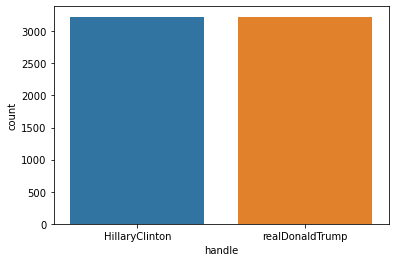

In [24]:
sns.countplot(x='handle', data = tweets)

### Number of tweets by the months

Time Analysis of the number of tweets

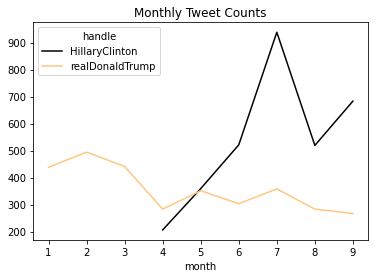

In [25]:
monthly_tweets = tweets.groupby(['month', 'handle']).size().unstack()
monthly_tweets.plot(title='Monthly Tweet Counts', colormap='copper')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Tweets month by month in 2016 election')

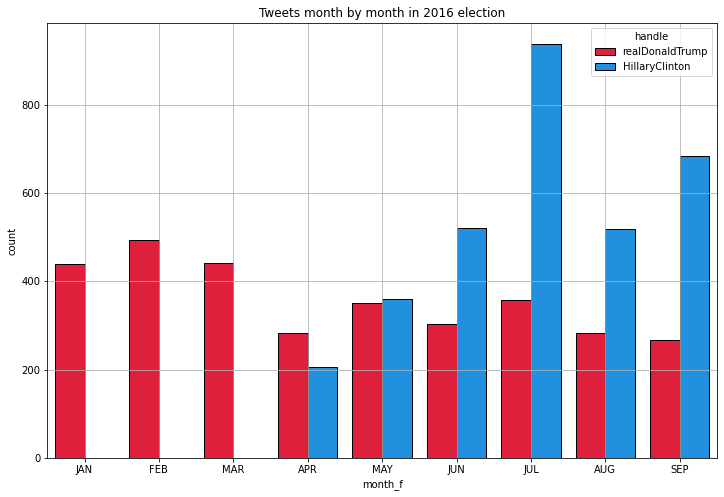

In [27]:
plt.figure(figsize = (12,8))
sns.countplot(x = "month_f",hue = "handle",palette = ["#ff0026","#0095ff"],
              data = tweets.sort_values(by = "month",ascending = True),
             linewidth = 1,edgecolor = "k"*tweets["month"].nunique())
plt.grid(True)
plt.title("Tweets month by month in 2016 election")
plt.show()

In [29]:
#trump tweets without retweets
tweets_trump = (tweets[(tweets["handle"] == "realDonaldTrump") &(tweets["is_retweet"] == False)].reset_index().drop(columns = ["index"],axis = 1))

#trump tweets with retweets
tweets_trump_retweets   = (tweets[(tweets["handle"] == "realDonaldTrump") & (tweets["is_retweet"] == True)].reset_index().drop(columns = ["index"],axis = 1))

#hillary tweets without retweets
tweets_hillary = (tweets[(tweets["handle"] == "HillaryClinton") & (tweets["is_retweet"] == False)].reset_index().drop(columns = ["index"],axis = 1))

#hillary tweets with retweets
tweets_hillary_retweets  = (tweets[(tweets["handle"] == "HillaryClinton") & (tweets["is_retweet"] == True)].reset_index().drop(columns = ["index"],axis = 1))

### Let's see who retweets more

This may be a signal of each leader's community building effort

<Figure size 936x432 with 0 Axes>

Text(0, 0.5, '')

Text(0.5, 1.0, 'Percentage of Trump retweets')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Percentage of Hillary retweets')

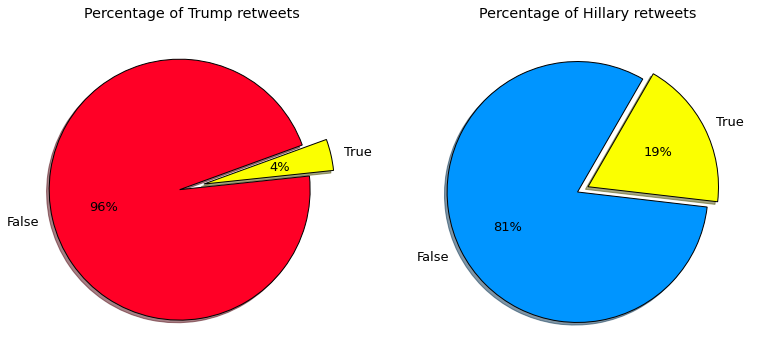

In [30]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets[tweets["handle"] =="realDonaldTrump"]["is_retweet"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                explode = [.1,0.09],
                                                                startangle = 20,
                                                                colors = ["#ff0026","#fbff00"]
                                                               )
plt.ylabel("")
plt.title("Percentage of Trump retweets")


plt.subplot(122)
tweets[tweets["handle"] =="HillaryClinton"]["is_retweet"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                explode = [.09,0],
                                                                startangle = 60,
                                                                colors = ["#0095ff","#fbff00"]
                                                               )
plt.ylabel("")
plt.title("Percentage of Hillary retweets")
plt.show()


In [31]:
from IPython.display import HTML
html2 = '<img src="giphy-6.gif" width="500" height="500" align="centre"/>'
HTML(html2)

### Data Cleaning

I used Regular expression for deleting and cleaning some of the expression. I cleaned for 5 rows first. 

If it works, I'll use it for the entire dataset

In [32]:
import re

In [33]:
first_text = data.text[5]   
text = re.sub("[^a-zA-Z]"," ", first_text)
text = text.lower()

In [34]:
text

'join me for a  pm rally   tomorrow at the mid america center in council bluffs  iowa  tickets   https   t co dfzsbicixc'

I downloaded nltk for using 'stopwords' and 'punkt'

In [35]:
import nltk
nltk.download("stopwords") 
nltk.download("punkt")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Splitting words with tokenize module from nltk

In [36]:
text = nltk.word_tokenize(text)

Cleaning all useless words with stopwords.

In [37]:
text = [ word for word in text if not word in set(stopwords.words("english"))]

Testing

In [38]:
text

['join',
 'pm',
 'rally',
 'tomorrow',
 'mid',
 'america',
 'center',
 'council',
 'bluffs',
 'iowa',
 'tickets',
 'https',
 'co',
 'dfzsbicixc']

In [39]:
import nltk as nlp
nltk.download('wordnet')

lemma = nlp.WordNetLemmatizer()
text = [lemma.lemmatize(word) for word in text]

text = " ".join(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

5 rows have been cleaned. Duplicating process for all data.

In [40]:
text_list = []
for text in data.text:
    text = re.sub("[^a-zA-Z]"," ", text)
    text= text.lower()
    text= nltk.word_tokenize(text)
    text = [ word for word in text if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list.append(text)

In [41]:
text_list

['question election put plan action make life better http co xreey oicg',
 'last night donald trump said paying tax smart know call unpatriotic http co xmbfj zf',
 'proud hillaryclinton vision command last night debate showed ready next potus',
 'stand together nothing make sure ready vote http co ttgeqxnqym http co q ymbb uny',
 'candidate asked confront racial injustice one real answer http co sjneokckis',
 'join pm rally tomorrow mid america center council bluff iowa ticket http co dfzsbicixc',
 'election important sit go http co ttgeqxnqym make sure registered nationalvoterregistrationday h',
 'donald trump go low register vote http co ttgeqxnqym http co dxz dewszs',
 'government people join movement today http co lwjydbphav http co uywjrtzkae',
 'trump offered single proposal reduce friction starting business hillaryclinton http co ohfafefsuq',
 'election week away check registered vote http co hcmah ljr take cl http co h h haa xm',
 'national voterregistrationday make sure regist

CountVectorizer onverts a collection of text documents to a matrix of token counts

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 5000

count_vectorizer = CountVectorizer(max_features=max_features, stop_words="english")
sparce_matrix = count_vectorizer.fit_transform(text_list).toarray()

Most used words 

In [43]:
print(f"{max_features} most used words:\n\n{count_vectorizer.get_feature_names()}")

5000 most used words:

['aa', 'ab', 'abandon', 'abandoned', 'abc', 'abcpolitics', 'aberdeen', 'ability', 'able', 'abolish', 'abortion', 'abroad', 'absentee', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'ac', 'accept', 'acceptance', 'accepted', 'accepts', 'access', 'accomplished', 'according', 'account', 'accountable', 'accurate', 'accused', 'acerque', 'achieve', 'achieved', 'act', 'acting', 'action', 'activist', 'activity', 'actonclimate', 'actor', 'actual', 'actually', 'actuar', 'ad', 'ada', 'adam', 'add', 'added', 'addiction', 'additional', 'address', 'addressing', 'adei', 'adelante', 'administration', 'admiration', 'admire', 'admit', 'admonished', 'adopt', 'adoption', 'adult', 'advantage', 'advertiser', 'advertising', 'advice', 'adviser', 'advisor', 'advocate', 'ae', 'aegyodb', 'af', 'affect', 'affected', 'affecting', 'afford', 'affordable', 'aflcio', 'afr', 'afraid', 'african', 'afternoon', 'afxw', 'ag', 'age', 'agenda', 'agent', 'ago', 'agree', 'agreed', 'agreement', '

## Creating Word clouds

In [44]:
from wordcloud import WordCloud, STOPWORDS 

In [45]:
donald_tweets = tweets[tweets['handle']=='realDonaldTrump']

In [46]:
hillary_tweets = tweets[tweets['handle']=='HillaryClinton']

In [47]:
def getWordCloud(df,col):
  comment_words = '' 
  stopwords = set(STOPWORDS) 
    
  for val in df[col]: 
        
      val = str(val) 
      tokens = val.split() 
        
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
        
      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
    
                       
  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off")
  plt.tight_layout(pad = 0) 
    
  plt.show()

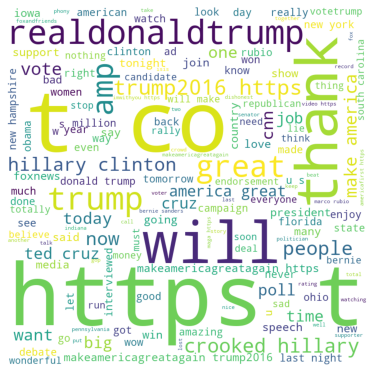

In [48]:
getWordCloud(donald_tweets,'text')

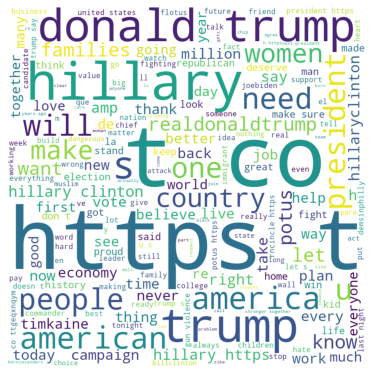

In [49]:
getWordCloud(hillary_tweets,'text')

These word clouds are not good. They have handles and links.

## Preprocessing the Tweets. 

I have removed the New Line Characters, URLs, Tagged handles,Tags and Quote Authors to preprocess Hillary Tweets such that these frequent Tags, Tagged Handles, Quote Authors and random URL does not get generated every time.

In [50]:
def removeTagTaggedHandlesQuoteAuthor(text):
    text = " ".join([x for x in text.split(" ") if not x.startswith("@")])
    text = " ".join([x for x in text.split(" ") if not x.startswith("#")])
    text = " ".join([x for x in text.split(" ") if not x.startswith("—")])
    return text
    
donald_tweets['preProcessedText'] = donald_tweets['text'].str.replace('http\S+|www.\S+', '', case=False)
donald_tweets['preProcessedText'] = donald_tweets['preProcessedText'].str.replace('\n','')
donald_tweets['preProcessedText'] = donald_tweets['preProcessedText'].apply(removeTagTaggedHandlesQuoteAuthor)

hillary_tweets['preProcessedText'] = hillary_tweets['text'].str.replace('http\S+|www.\S+', '', case=False)
hillary_tweets['preProcessedText'] = hillary_tweets['preProcessedText'].str.replace('\n','')
hillary_tweets['preProcessedText'] = hillary_tweets['preProcessedText'].apply(removeTagTaggedHandlesQuoteAuthor)

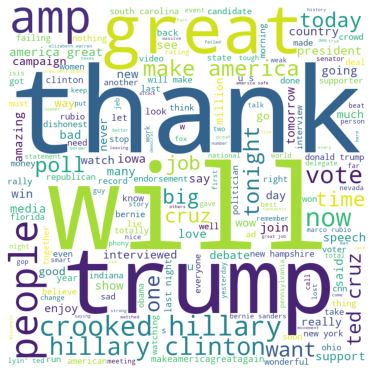

In [51]:
getWordCloud(donald_tweets,'preProcessedText')

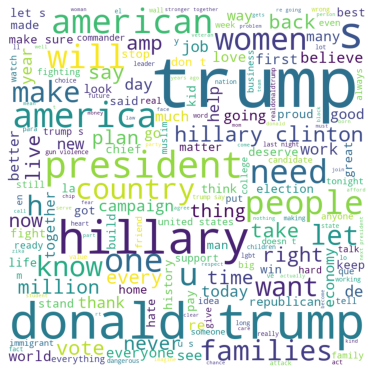

In [52]:
getWordCloud(hillary_tweets,'preProcessedText')

## Sentiment Analysis

Gauging the sentiment by just looking at the tweets manually is hard since

1. There are too many tweets (obviously!)
2. Many tweets are filled with sarcasm 

In [53]:
from IPython.display import HTML
html1 = '<img src="gif1.gif" width="700" height="700" align="center"/>'
HTML(html1)

<Figure size 720x360 with 0 Axes>

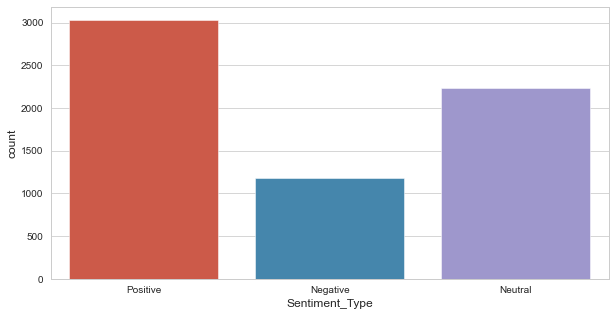

In [54]:
from textblob import TextBlob

bloblist_desc = list()  

df_tweet_descr_str=tweets['text'].astype(str)   

for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

def f(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_polarity_desc['Sentiment_Type'] = df_tweet_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_tweet_polarity_desc)

## Who said it? Trump or Clinton?

In [55]:
df1 = pd.read_csv('tweets.csv', encoding="utf-8")
df1 = df1[['handle','text','is_retweet']]

df = df1.loc[df1['is_retweet'] == False]
df = df.copy().reset_index(drop=True)

Using RegEx to filter and extract mentions from tweets

In [56]:
def all_mentions(tw):    
    test2 = re.findall('(\@[A-Za-z_]+)', tw)
    if test2:
        return test2
    else:
        return ""

df['top_mentions'] = df['text'].apply(lambda x: all_mentions(x))

mention_list_trump = []
mention_list_clinton = []
for n in range(len(df['top_mentions'])):
    if df['handle'][n] == 'realDonaldTrump':
        mention_list_trump += df['top_mentions'][n]
    elif df['handle'][n] == 'HillaryClinton':
        mention_list_clinton += df['top_mentions'][n]

<Figure size 864x252 with 0 Axes>

Text(0.5, 1.0, "Trump's most used mentions")

<Figure size 864x252 with 0 Axes>

Text(0.5, 1.0, "Clinton's most used mentions")

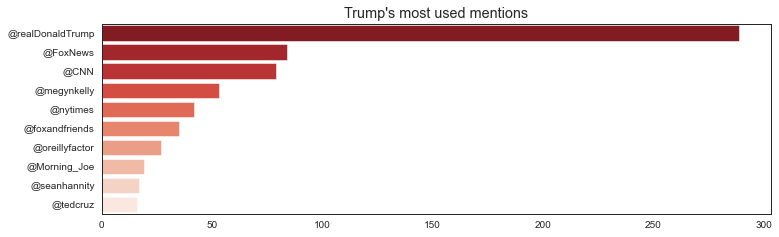

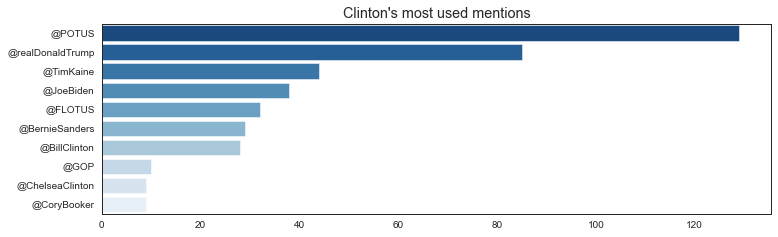

In [57]:
data1 = pd.Series(mention_list_trump).value_counts().head(n=10)
sns.set_style("white")
plt.figure(figsize=(12, 3.5))
sns.barplot(x=data1, y=data1.index, orient='h', palette="Reds_r").set_title("Trump's most used mentions")

data2 = pd.Series(mention_list_clinton).value_counts().head(n=10)
sns.set_style("white")
plt.figure(figsize=(12, 3.5))
sns.barplot(x=data2, y=data2.index, orient='h', palette="Blues_r").set_title("Clinton's most used mentions")

Seems like one thing both candidates had in common was their frequent mention of Trump. Surprinsingly, while Trump was Hillary's 2nd most mentioned account, she was not on Trump's list.

In [58]:
def get_hashtags(tw):
    test3 = re.findall('(\#[A-Za-z_]+)', tw)
    if test3:
        return test3
    else:
        return ""

df['top_hashtags'] = df['text'].apply(lambda x: get_hashtags(x))

hashtags_list_trump = []
hashtags_list_clinton = []
for n in range(len(df['top_hashtags'])):
    if df['handle'][n] == 'realDonaldTrump':
        hashtags_list_trump += df['top_hashtags'][n]
    elif df['handle'][n] == 'HillaryClinton':
        hashtags_list_clinton += df['top_hashtags'][n]

<Figure size 828x252 with 0 Axes>

Text(0.5, 1.0, "Trump's most used hashtags")

<Figure size 878.4x252 with 0 Axes>

Text(0.5, 1.0, "Clinton's most used hashtags")

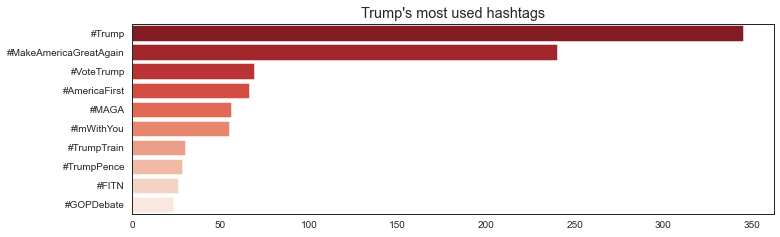

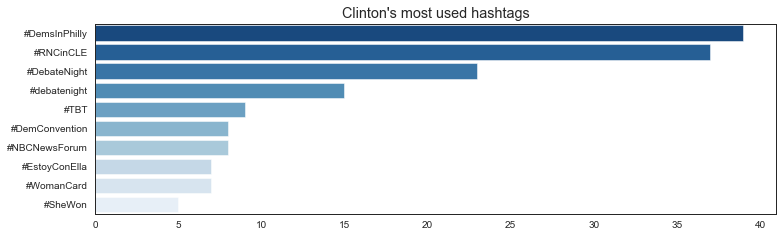

In [59]:
data3 = pd.Series(hashtags_list_trump).value_counts().head(n=10)
sns.set_style("white")
plt.figure(figsize=(11.5, 3.5))
sns.barplot(x=data3, y=data3.index, orient='h', palette="Reds_r").set_title("Trump's most used hashtags")

data4 = pd.Series(hashtags_list_clinton).value_counts().head(n=10)
sns.set_style("white")
plt.figure(figsize=(12.2, 3.5))
sns.barplot(x=data4, y=data4.index, orient='h', palette="Blues_r").set_title("Clinton's most used hashtags")

It seems Trump was much more fond of #hashtags than Hillary, using his favorite hashtag (#Trump) almost 9x more than she used her favorite (#DemsInPhilly).

In [60]:
df['length_no_url'] = df['text']
df['length_no_url'] = df['length_no_url'].apply(lambda x: len(x.lower().split('http')[0]))
df['message'] = df['text'].apply(lambda x: x.lower().split('http')[0])

def candidate_code(x):
    if x == 'HillaryClinton':
        return 'Hillary'
    elif x == 'realDonaldTrump':
        return 'Trump'
    else:
        return ''

df['label'] = df['handle'].apply(lambda x: candidate_code(x))

In [61]:
messages = df[['label','message']]

## Tweet Classification

Model Used: Naive Bayes

In [62]:
html3 = '<img src="nb.jpg" width="700" height="700" align="center"/>'
HTML(html3)

In [63]:
print(messages[:5])

     label                                            message
0  Hillary  the question in this election: who can put the...
1  Hillary  if we stand together, there's nothing we can't...
2  Hillary  both candidates were asked about how they'd co...
3    Trump  join me for a 3pm rally - tomorrow at the mid-...
4  Hillary  this election is too important to sit out. go to 


In [64]:
def split_into_tokens(message):
    message = message  # convert bytes into proper unicode
    return TextBlob(message).words

In [65]:
messages.message.head()

0    the question in this election: who can put the...
1    if we stand together, there's nothing we can't...
2    both candidates were asked about how they'd co...
3    join me for a 3pm rally - tomorrow at the mid-...
4    this election is too important to sit out. go to 
Name: message, dtype: object

In [66]:
messages.message.head().apply(split_into_tokens)

0    [the, question, in, this, election, who, can, ...
1    [if, we, stand, together, there, 's, nothing, ...
2    [both, candidates, were, asked, about, how, th...
3    [join, me, for, a, 3pm, rally, tomorrow, at, t...
4    [this, election, is, too, important, to, sit, ...
Name: message, dtype: object

In [67]:
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

messages.message.head().apply(split_into_lemmas)

0    [the, question, in, this, election, who, can, ...
1    [if, we, stand, together, there, 's, nothing, ...
2    [both, candidate, were, asked, about, how, the...
3    [join, me, for, a, 3pm, rally, tomorrow, at, t...
4    [this, election, is, too, important, to, sit, ...
Name: message, dtype: object

In [68]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])
print(len(bow_transformer.vocabulary_))
print(bow_transformer.get_feature_names()[:5])

8582
["'16", "'84", "'american", "'amnesty", "'as"]


In [69]:
messages_bow = bow_transformer.transform(messages['message'])
print('sparse matrix shape:', messages_bow.shape)
print('number of non-zeros:', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

sparse matrix shape: (5722, 8582)
number of non-zeros: 92968
sparsity: 0.19%


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

In [71]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [72]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['the']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['hannity']])

1.882447426405206
7.860488953181047


In [73]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5722, 8582)


In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
%time spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])

Wall time: 45.1 ms


In [76]:
all_predictions = spam_detector.predict(messages_tfidf)

In [77]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [78]:
tr_acc = accuracy_score(messages['label'], all_predictions)
print("Accuracy on training set:  %.2f%%" % (100 * tr_acc))

Accuracy on training set:  96.96%


[Text(11.5, 0.5, 'Expected Value'), Text(0.5, 2.5, 'Predicted Value')]

Text(0.5, 1.0, 'Training Set Confusion Matrix')

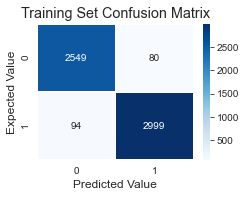

In [79]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(messages['label'], all_predictions), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')

In [80]:
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

     Hillary       0.96      0.97      0.97      2629
       Trump       0.97      0.97      0.97      3093

    accuracy                           0.97      5722
   macro avg       0.97      0.97      0.97      5722
weighted avg       0.97      0.97      0.97      5722



In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 

In [82]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4577 1145 5722


In [83]:
from sklearn.pipeline import Pipeline

## Pipeline

In [84]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=split_into_lemmas)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [85]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

[0.93231441 0.9279476  0.95851528 0.9279476  0.92358079 0.94541485
 0.93668122 0.92778993 0.9321663  0.92778993]


In [86]:
print('Mean score:', scores.mean(), '\n')
print('Stdev:', scores.std())

Mean score: 0.9340147917403228 

Stdev: 0.010018189904591837


In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
import pprint

In [89]:
params = {
    'tfidf__use_idf': (True, False),
    'bow__analyzer': (split_into_lemmas, split_into_tokens),
}

grid = GridSearchCV(
    pipeline,  # pipeline from above
    params,  # parameters to tune via cross validation
    refit=True,  # fit using all available data at the end, on the best found param combination
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores"
    scoring='accuracy',  # what score are we optimizing?
    cv= StratifiedKFold(n_splits = 5)  # what type of cross validation to use
)

%time nb_detector = grid.fit(msg_train, label_train)
pprint.pprint(nb_detector.cv_results_)


Wall time: 30.6 s
{'mean_fit_time': array([7.56437154, 7.13243852, 5.88148098, 5.40909562]),
 'mean_score_time': array([1.65666599, 1.8124979 , 1.2503202 , 1.14035177]),
 'mean_test_score': array([0.93336173, 0.92789844, 0.93183311, 0.93052092]),
 'param_bow__analyzer': masked_array(data=[<function split_into_lemmas at 0x0000021BF31B4EE0>,
                   <function split_into_lemmas at 0x0000021BF31B4EE0>,
                   <function split_into_tokens at 0x0000021BF31B45E0>,
                   <function split_into_tokens at 0x0000021BF31B45E0>],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_tfidf__use_idf': masked_array(data=[True, False, True, False],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'bow__analyzer': <function split_into_lemmas at 0x0000021BF31B4EE0>,
             'tfidf__use_idf': True},
            {'bow__analyzer': <function split_into_lemmas

Extract words used by Trump / Hillary with the highest inverse document frequency scores (tf_idf):

In [90]:
top_h = {}
top_t = {}

for w in (bow_transformer.get_feature_names()[:len(bow_transformer.get_feature_names())]):
    p = nb_detector.predict_proba([w])[0][0]
    if len(w) > 3:
        if p > 0.5:
            top_h[w] = p
        elif p < 0.5:
            top_t[w] = p
    else:
        pass
    
top_t_10 = sorted(top_t, key=top_t.get, reverse=False)[:8]
top_h_10 = sorted(top_h, key=top_h.get, reverse=True)[:8]

dic = {}
for l in [top_t_10, top_h_10]:
    for key, values in (top_t.items() | top_h.items()):
        if key in l:
            dic[key] = values
            
top_df = pd.DataFrame(list(dic.items()), columns=['word', 'hillary_prob'])
top_df['trump_prob'] = (1 - top_df['hillary_prob'])
top_df_t = top_df[:int((len(dic)/2))]
top_df_t = top_df_t[['word','trump_prob','hillary_prob']]
top_df_h = top_df[int((len(dic)/2)):]

In [91]:
predictions = nb_detector.predict(msg_test)
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

     Hillary       0.92      0.93      0.92       521
       Trump       0.94      0.93      0.94       624

    accuracy                           0.93      1145
   macro avg       0.93      0.93      0.93      1145
weighted avg       0.93      0.93      0.93      1145



[Text(11.5, 0.5, 'Expected Value'), Text(0.5, 2.5, 'Predicted Value')]

Text(0.5, 1.0, 'Test Set Confusion Matrix')

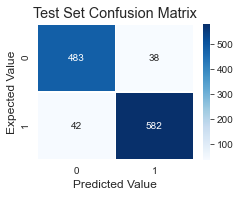

In [92]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(label_test, predictions), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Test Set Confusion Matrix')

## Finding the most representative words for each candidate.
This model cares more about how rare a word is, not just frequency.

Many words used by a candidate will also be used by his/her rival, not giving much insight into the tweet's author. For example, the term "and" is used frequently in the dataset, but passing it through the model will result in a prediction probability of about 50/50 (not helpful at all); however, there are terms that are used much less frequently, but almost exclusively by certain candidates. Those are the words (or groups of words) this model looks for in order to make an accurate prediction.

([<matplotlib.axis.YTick at 0x21bf5583760>,
 [Text(0, 0, 'makeamericagreatagain'),
  Text(0, 0, 'crooked'),
  Text(0, 0, 'americafirst'),
  Text(0, 0, 'votetrump'),
  Text(0, 0, 'enjoy'),
  Text(0, 0, 'trump2016'),
  Text(0, 0, 'imwithyou'),
  Text(0, 0, 'foxnews')])

Text(0.5, 1.0, 'Words with highest probability of indicating a Trump tweet')

Text(0.5, 0, 'Probability')

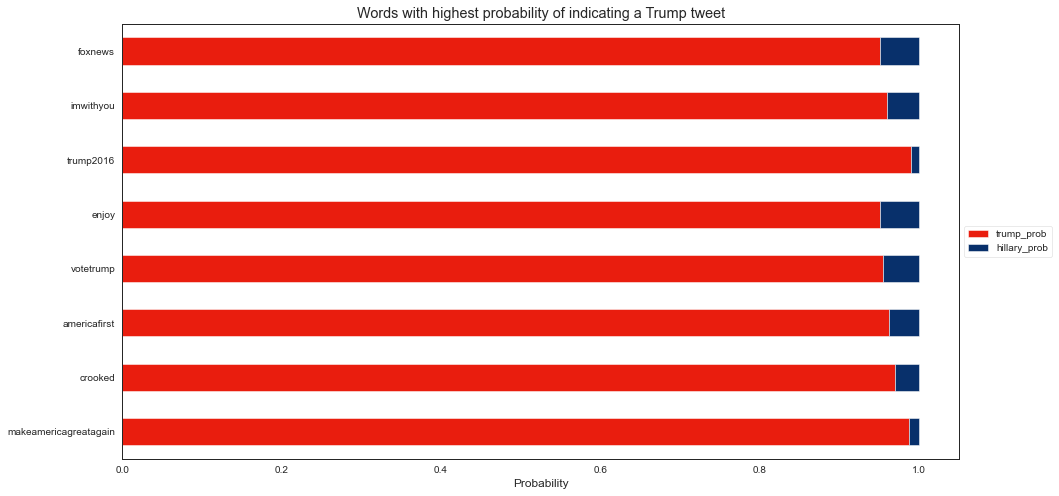

In [93]:
sns.set_context({"figure.figsize": (15, 8)})
top_df_t.plot(kind='barh', stacked=True, color=["#E91D0E","#08306B"]).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(range(len(top_df_t['word'])), list(top_df_t['word']))
plt.title('Words with highest probability of indicating a Trump tweet')
plt.xlabel('Probability')

([<matplotlib.axis.YTick at 0x21bf55dfd00>,
 [Text(0, 0, 'joebiden'),
  Text(0, 0, 'deserve'),
  Text(0, 0, 'flotus'),
  Text(0, 0, 'timkaine'),
  Text(0, 0, 'demsinphilly'),
  Text(0, 0, 'billclinton'),
  Text(0, 0, 'health'),
  Text(0, 0, '—hillary')])

Text(0.5, 1.0, 'Words with highest probability of indicating a Hillary tweet')

Text(0.5, 0, 'Probability')

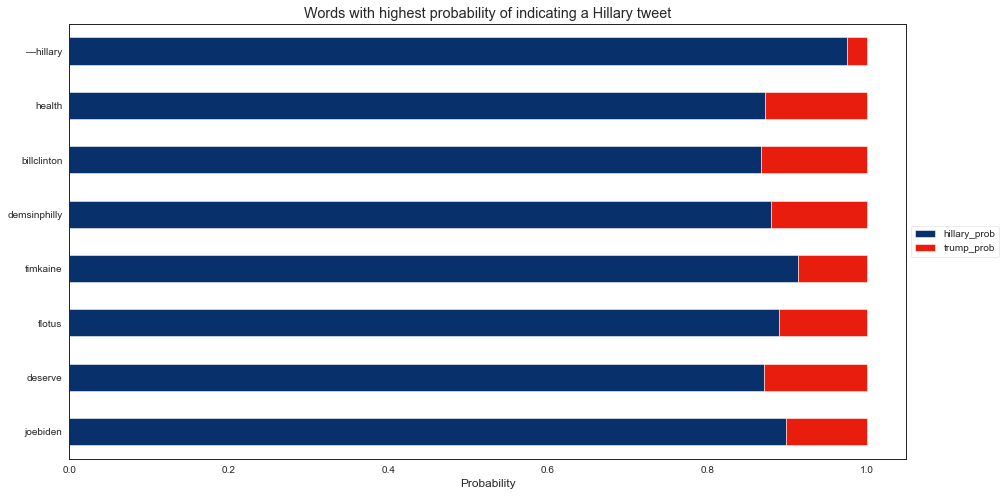

In [94]:
sns.set_context({"figure.figsize": (15, 8)})
top_df_h.plot(kind='barh', stacked=True, color=["#08306B","#E91D0E"]).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(range(len(top_df_h['word'])), list(top_df_h['word']))
plt.title('Words with highest probability of indicating a Hillary tweet')
plt.xlabel('Probability')

In [95]:
my_1st_tweet = 'America needs a leader who treats all women with respect'
my_2nd_tweet = 'Interesting how President Obama so haltingly said I "would never be president" - This from perhaps the worst president in U.S. history!'

In [96]:
print("Tweet #1:", "'",my_1st_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([my_1st_tweet])[0])), "sure this was tweeted by", nb_detector.predict([my_1st_tweet])[0])

Tweet #1: ' America needs a leader who treats all women with respect '  
 
 I'm about 80% sure this was tweeted by Hillary


In [97]:
print("Tweet #2:", "'",my_2nd_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([my_2nd_tweet])[0])), "sure this was tweeted by", nb_detector.predict([my_2nd_tweet])[0])


Tweet #2: ' Interesting how President Obama so haltingly said I "would never be president" - This from perhaps the worst president in U.S. history! '  
 
 I'm about 72% sure this was tweeted by Trump


### Let's test it with any random tweet

In [113]:
your_tweet = "Obama is the worst president"


print("Tweet #3:", "'",your_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([your_tweet])[0])), "sure this was tweeted by", nb_detector.predict([your_tweet])[0])

Tweet #3: ' Obama is the worst president '  
 
 I'm about 67% sure this was tweeted by Trump


In [99]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
